In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

In [ ]:
data = pd.read_csv('/data/data_BTL_V.csv')
dataset = data['maxtemp'].values
dataset = dataset.reshape(-1, 1)

In [4]:
data.head(10)

,datetime,temp,dewpoint,maxtemp,mintemp,precipitation,humidity,windspeed,winddeg
0,1/1/2023,14.16,9.77,19.33,9.40,0.01,76.24,1.82,24.4
1,1/2/2023,14.27,11.14,18.47,9.99,0.73,82.32,2.55,44.3
2,1/3/2023,14.76,9.85,18.88,10.95,0.13,73.39,2.07,27.7
3,1/4/2023,15.89,12.86,20.89,12.52,0.00,83.76,1.77,118.7
4,1/5/2023,17.14,14.35,21.10,13.35,0.00,84.15,2.28,42.7
5,1/6/2023,15.17,10.43,22.23,9.08,0.00,75.17,4.10,14.3
6,1/7/2023,16.69,10.09,21.59,11.78,0.00,66.27,2.02,356.5
7,1/8/2023,17.33,13.87,22.46,13.81,0.01,81.84,1.77,110.4
8,1/9/2023,18.63,15.50,22.68,15.44,1.98,82.72,1.76,27.3
9,1/10/2023,17.58,16.19,20.08,15.28,10.43,91.74,1.83,16.4


In [5]:
data.isnull().sum()

,0
datetime,0
temp,0
dewpoint,0
maxtemp,0
mintemp,0
precipitation,0
humidity,0
windspeed,0
winddeg,0


In [7]:
columns_check= ['temp','dewpoint','maxtemp','mintemp',
                'precipitation','humidity','windspeed','winddeg']

zero_rows = data[(data[columns_check] == 0).any(axis=1)]
sum_zero = len(zero_rows)

zero_location = zero_rows.index

display(zero_rows)
print("Tổng số dòng có dữ liệu bằng 0: ",sum_zero)

,datetime,temp,dewpoint,maxtemp,mintemp,precipitation,humidity,windspeed,winddeg
3,1/4/2023,15.89,12.86,20.89,12.52,0.0,83.76,1.77,118.7
4,1/5/2023,17.14,14.35,21.10,13.35,0.0,84.15,2.28,42.7
5,1/6/2023,15.17,10.43,22.23,9.08,0.0,75.17,4.10,14.3
6,1/7/2023,16.69,10.09,21.59,11.78,0.0,66.27,2.02,356.5
17,1/18/2023,11.64,6.15,16.95,7.08,0.0,70.76,2.30,63.2
...,...,...,...,...,...,...,...,...,...
811,3/22/2025,19.75,14.17,26.06,15.33,0.0,73.61,2.27,143.5
822,4/2/2025,19.97,13.66,25.98,15.34,0.0,69.43,1.90,117.4
823,4/3/2025,20.05,14.69,26.56,15.06,0.0,74.71,2.60,142.9
835,4/15/2025,23.72,16.21,31.85,18.49,0.0,67.27,2.16,159.9


Tổng số dòng có dữ liệu bằng 0:  140


In [8]:
data_handle = data.copy()

median_values = data_handle[columns_check].median()
data_handle[columns_check] = data_handle[columns_check].replace(0, median_values)

rows_median = data_handle.loc[zero_location]
print("Dữ liệu sau khi đã xử lý:")
display(rows_median)

Dữ liệu sau khi đã xử lý:


,datetime,temp,dewpoint,maxtemp,mintemp,precipitation,humidity,windspeed,winddeg
3,1/4/2023,15.89,12.86,20.89,12.52,0.625,83.76,1.77,118.7
4,1/5/2023,17.14,14.35,21.10,13.35,0.625,84.15,2.28,42.7
5,1/6/2023,15.17,10.43,22.23,9.08,0.625,75.17,4.10,14.3
6,1/7/2023,16.69,10.09,21.59,11.78,0.625,66.27,2.02,356.5
17,1/18/2023,11.64,6.15,16.95,7.08,0.625,70.76,2.30,63.2
...,...,...,...,...,...,...,...,...,...
811,3/22/2025,19.75,14.17,26.06,15.33,0.625,73.61,2.27,143.5
822,4/2/2025,19.97,13.66,25.98,15.34,0.625,69.43,1.90,117.4
823,4/3/2025,20.05,14.69,26.56,15.06,0.625,74.71,2.60,142.9
835,4/15/2025,23.72,16.21,31.85,18.49,0.625,67.27,2.16,159.9


In [ ]:
data_handle.to_csv("/data/data_pre_BTL.csv", index=False)
print("Dữ liệu xử lý đã được lưu vào file data_pre_BTL.csv")

Dữ liệu xử lý đã được lưu vào file data_pre_BTL.csv


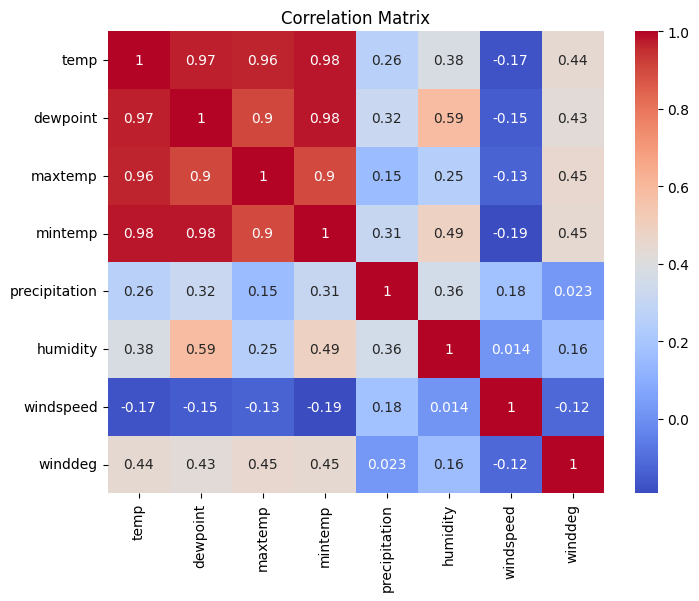

In [10]:
import seaborn as sb

data['datetime'] = pd.to_datetime(data['datetime'])
numeric_data = data.select_dtypes(include=np.number)

corr_matrix = numeric_data.corr()

plt.figure(figsize=(8, 6))
sb.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [11]:
prop_maxtemp = data[['maxtemp','temp','dewpoint','mintemp']]
display(prop_maxtemp)

,maxtemp,temp,dewpoint,mintemp
0,19.33,14.16,9.77,9.40
1,18.47,14.27,11.14,9.99
2,18.88,14.76,9.85,10.95
3,20.89,15.89,12.86,12.52
4,21.10,17.14,14.35,13.35
...,...,...,...,...
887,33.85,29.09,26.51,26.06
888,33.99,29.49,27.04,26.81
889,32.81,29.27,27.22,27.05
890,29.20,27.84,26.06,25.84


In [12]:
prop_mintemp = data[['mintemp','temp','dewpoint','maxtemp']]
display(prop_mintemp)

,mintemp,temp,dewpoint,maxtemp
0,9.40,14.16,9.77,19.33
1,9.99,14.27,11.14,18.47
2,10.95,14.76,9.85,18.88
3,12.52,15.89,12.86,20.89
4,13.35,17.14,14.35,21.10
...,...,...,...,...
887,26.06,29.09,26.51,33.85
888,26.81,29.49,27.04,33.99
889,27.05,29.27,27.22,32.81
890,25.84,27.84,26.06,29.20


In [13]:
scaler_maxtemp = MinMaxScaler()
scaler_maxtemp.fit(prop_maxtemp)

normal_maxtemp = scaler_maxtemp.transform(prop_maxtemp)
df_normal_maxtemp = pd.DataFrame(normal_maxtemp, columns=prop_maxtemp.columns)
display(df_normal_maxtemp)

,maxtemp,temp,dewpoint,mintemp
0,0.280184,0.276152,0.299203,0.244596
1,0.251969,0.280561,0.353785,0.268215
2,0.265420,0.300200,0.302390,0.306645
3,0.331365,0.345491,0.422311,0.369496
4,0.338255,0.395591,0.481673,0.402722
...,...,...,...,...
887,0.756562,0.874549,0.966135,0.911529
888,0.761155,0.890581,0.987251,0.941553
889,0.722441,0.881764,0.994422,0.951161
890,0.604003,0.824449,0.948207,0.902722


In [ ]:
import os

dir = "/data"

file_path = os.path.join(dir, "datanormal_maxtemp_BTL.csv")

df_normal_maxtemp.to_csv(file_path, index=False)
print("Dữ liệu xử lý đã được lưu vào file datanormal_maxtemp_BTL.csv")

Dữ liệu xử lý đã được lưu vào file datanormal_maxtemp_BTL.csv


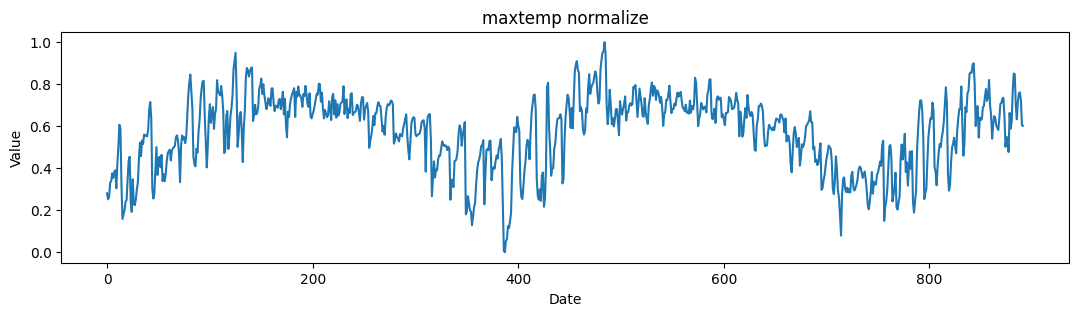

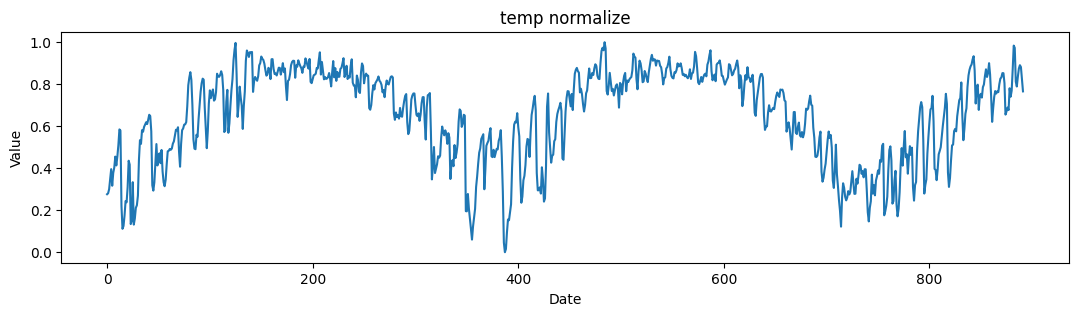

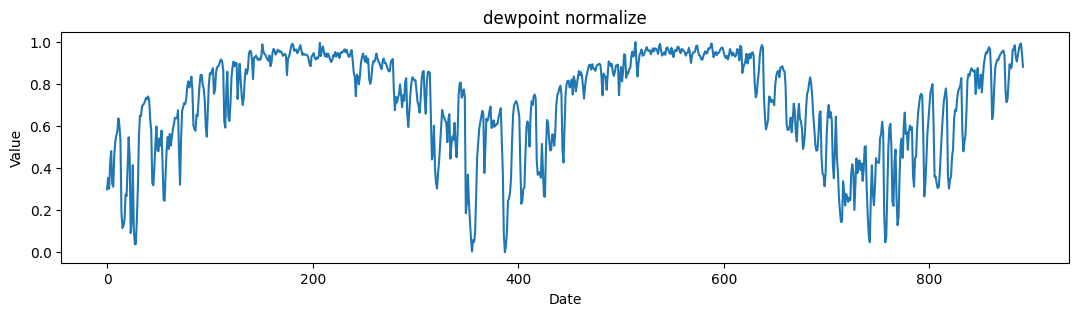

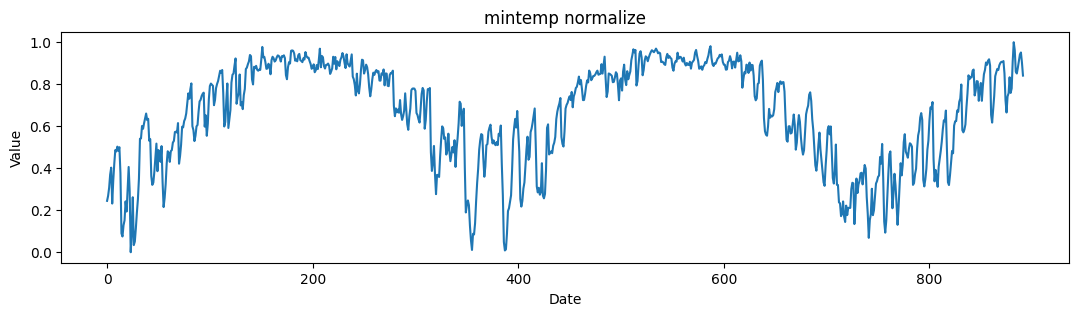

In [15]:
for column in df_normal_maxtemp.columns:
    plt.figure(figsize=(13, 3))
    plt.plot(df_normal_maxtemp[column])
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title(column + ' normalize')
    plt.show()

In [16]:
scaler_mintemp = MinMaxScaler()
scaler_mintemp.fit(prop_mintemp)

normal_mintemp = scaler_mintemp.transform(prop_mintemp)
df_normal_mintemp = pd.DataFrame(normal_mintemp, columns=prop_mintemp.columns)
display(df_normal_mintemp)

,mintemp,temp,dewpoint,maxtemp
0,0.244596,0.276152,0.299203,0.280184
1,0.268215,0.280561,0.353785,0.251969
2,0.306645,0.300200,0.302390,0.265420
3,0.369496,0.345491,0.422311,0.331365
4,0.402722,0.395591,0.481673,0.338255
...,...,...,...,...
887,0.911529,0.874549,0.966135,0.756562
888,0.941553,0.890581,0.987251,0.761155
889,0.951161,0.881764,0.994422,0.722441
890,0.902722,0.824449,0.948207,0.604003


In [ ]:
import os

dir = "/data"

file_path = os.path.join(dir, "datanormal_mintemp_BTL.csv")

df_normal_mintemp.to_csv(file_path, index=False)
print("Dữ liệu xử lý đã được lưu vào file datanormal_mintemp_BTL.csv")

Dữ liệu xử lý đã được lưu vào file datanormal_mintemp_BTL.csv


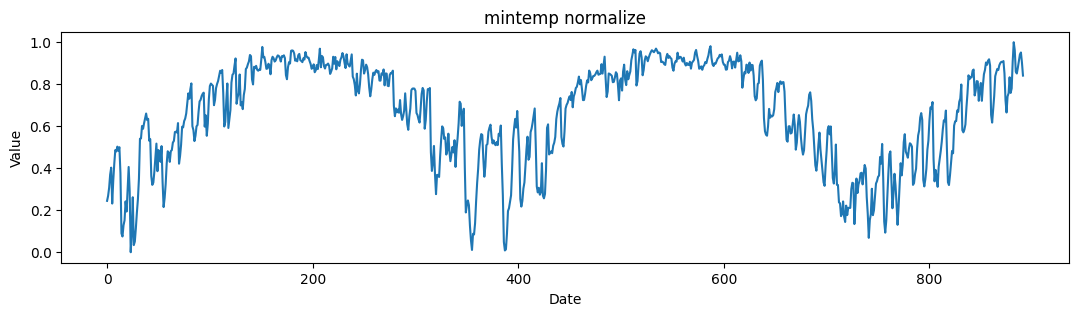

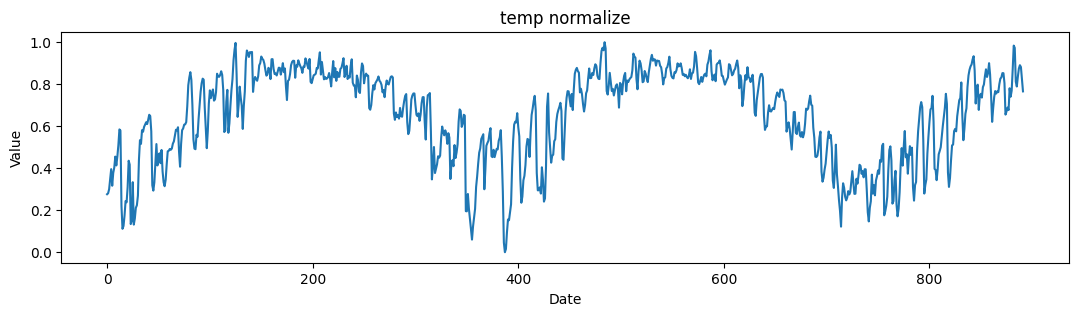

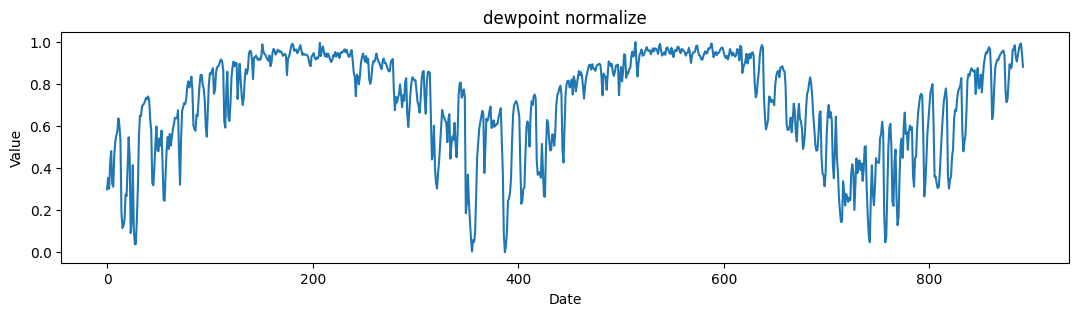

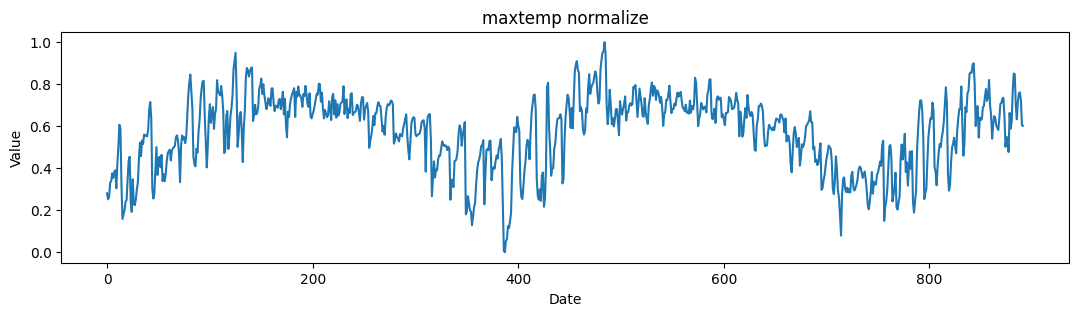

In [18]:
import matplotlib.pyplot as plt

# Vẽ biểu đồ cho từng cột dữ liệu
for column in df_normal_mintemp.columns:
    plt.figure(figsize=(13, 3))
    plt.plot(df_normal_mintemp[column])
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title(column + ' normalize')
    plt.show()